<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 6.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-01-20 12:11:57
-------------------
qualified stocks: 81
with latest results: 76
still star stocks: 40
-------------------
Initial Investment:  1.04 C
CY Investment:  1.17 C
Reserve:  10.39 L
Current:  1.16 C
-------------------
Today PnL: 41.23 K (0.36%)
Current PnL: -14.35 L (-12.22%)
CY Booked + Current PnL: -1.10 L (-0.93%)
-------------------
Total profit:  2.34 L
Total loss:  -16.69 L
-------------------
Total Booked + Current PnL: 12.01 L (11.52%)
Total Booked PnL: 26.36 L (25.28%)
Curr Year Booked PnL: 13.25 L (11.38%)
Prev Year Booked PnL: 13.11 L (12.57%)
Est FTT:  1.83 C
Est FTT PnL: 66.56 L (57.17%)
-------------------
Est LTT:  2.42 C
Est LTT PnL: 1.26 C (107.88%)
Deployed:  1.04 C
Current:  1.16 C
CAGR/XIRR %: 9.28%


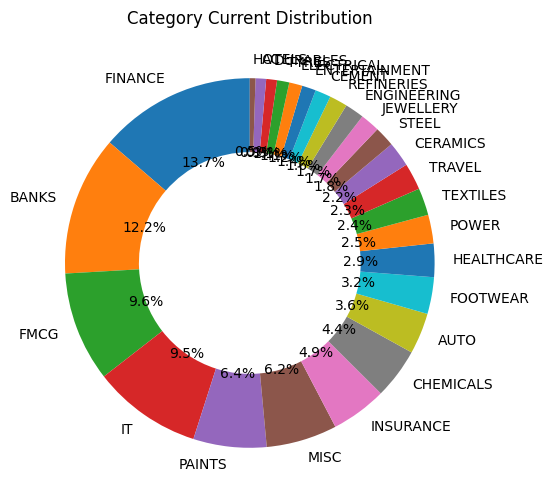

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'CapType', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
55,RELIANCE,1284.26,1526.00,-1.59,X-LC,93.83,167078.0,2693.0,28253.0,0.23,...,16.91,18.82,70.0,0.10,1.58,8.30,XY25,NTT,LC,REFINERIES
65,SIS,477.00,528.00,57.46,M-SC,17.28,56788.0,-24302.0,32971.0,-0.48,...,58.06,10.69,-27.0,-0.74,0.54,0.94,X40N,NTT,SC,MISC
48,NESTLEIND,2226.45,2755.00,-19.41,X-LC,82.72,141325.0,-1168.0,34992.0,-0.41,...,24.76,23.74,NaN,-0.03,1.33,2.71,XY25,NTT,LC,FMCG
18,CERA,9059.90,10420.45,-11.22,X-SC,37.04,68792.0,-21807.0,35414.0,-0.42,...,51.48,15.02,-54.0,-0.62,0.65,4.44,X40N,ATH,SC,CERAMICS
72,TCS,4164.02,4998.00,0.74,X-LC,59.26,159463.0,-2934.0,35465.0,-0.86,...,22.24,20.03,15.0,-0.08,1.50,12.18,X40,BTT,LC,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,REPCOHOME,527.76,880.00,-11.34,H-SC,62.35,152397.0,-42346.0,172331.0,0.90,...,113.08,66.74,-38.0,-0.25,1.44,10.64,XY24,NTT,SC,FINANCE
58,SAIL,130.64,228.00,46.62,M-MC,33.33,187819.0,-37143.0,204798.0,0.23,...,109.04,74.53,-22.0,-0.18,1.77,8.97,XY24,BTT,MC,STEEL
53,RBLBANK,230.61,388.00,-43.12,M-SC,77.78,156566.0,-77734.0,237636.0,-0.66,...,151.78,68.25,-50.0,-0.33,1.48,3.10,XY24,NTT,SC,BANKS
11,BANDHANBNK,217.54,400.00,-45.61,H-SC,45.68,167205.0,-71436.0,271591.0,0.78,...,162.43,83.87,-30.0,-0.26,1.58,10.71,XY24,NTT,SC,BANKS


In [5]:
# Xceptional allocation
tmp_df = df_portfolio_features[df_portfolio_features['Conviction'].str.startswith('X-', na=False)]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
55,RELIANCE,1284.26,1526.00,-1.59,X-LC,93.83,167078.0,2693.0,28253.0,0.23,...,16.91,18.82,70.0,0.10,1.58,8.30,XY25,NTT,LC,REFINERIES
48,NESTLEIND,2226.45,2755.00,-19.41,X-LC,82.72,141325.0,-1168.0,34992.0,-0.41,...,24.76,23.74,NaN,-0.03,1.33,2.71,XY25,NTT,LC,FMCG
18,CERA,9059.90,10420.45,-11.22,X-SC,37.04,68792.0,-21807.0,35414.0,-0.42,...,51.48,15.02,-54.0,-0.62,0.65,4.44,X40N,ATH,SC,CERAMICS
72,TCS,4164.02,4998.00,0.74,X-LC,59.26,159463.0,-2934.0,35465.0,-0.86,...,22.24,20.03,15.0,-0.08,1.50,12.18,X40,BTT,LC,IT
47,MRF,112863.40,150508.27,-10.77,X-MC,4.94,113113.0,250.0,37395.0,-0.73,...,33.06,33.35,NaN,0.01,1.07,0.10,AR,ATH,MC,TYRES
70,TATAELXSI,7332.28,9000.00,-20.85,X-MC,9.88,86457.0,-16195.0,39545.0,-0.59,...,45.74,22.74,-14.0,-0.41,0.82,3.94,X40N,NTT,MC,IT
43,LTIM,5664.39,7262.39,10.65,X-LC,75.31,175080.0,5148.0,42790.0,-0.92,...,24.44,28.21,1.0,0.12,1.65,28.61,X200,ATH,LC,IT
50,PIDILITIND,2482.94,3576.00,-17.56,X-LC,35.80,162690.0,18679.0,44723.0,-0.30,...,27.49,44.02,9.0,0.42,1.53,12.30,X40,BTT,LC,CHEMICALS
36,INFY,1436.24,2275.00,1.20,X-LC,38.27,188677.0,39308.0,47924.0,-0.07,...,25.40,58.40,37.0,0.82,1.78,31.66,X40,BTT,LC,IT
75,TTKPRESTIG,769.29,1149.24,12.00,X-SC,19.75,100136.0,-641.0,50418.0,0.42,...,50.35,49.39,0.0,-0.01,0.94,15.02,X40N,ATH,SC,DURABLES


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
55,RELIANCE,1284.26,1526.0,-1.59,X-LC,93.83,167078.0,2693.0,28253.0,0.23,...,16.91,18.82,70.0,0.10,1.58,8.30,XY25,NTT,LC,REFINERIES
48,NESTLEIND,2226.45,2755.0,-19.41,X-LC,82.72,141325.0,-1168.0,34992.0,-0.41,...,24.76,23.74,NaN,-0.03,1.33,2.71,XY25,NTT,LC,FMCG
21,DABUR,518.36,735.0,-6.68,X-MC,87.65,133773.0,1591.0,53656.0,-0.28,...,40.11,41.79,-1.0,0.03,1.26,6.94,XY24,BTT,MC,FMCG
39,JIOFIN,320.24,387.0,-17.11,M-LC,14.81,136468.0,-21731.0,54710.0,-0.99,...,40.09,20.85,44.0,-0.40,1.29,15.22,XY24,BTT,LC,FINANCE
26,GICRE,335.06,583.0,13.56,H-MC,12.35,196584.0,50163.0,58189.0,2.78,...,29.60,74.00,110.0,0.86,1.85,45.40,XY24,BTT,MC,INSURANCE
77,UNIONBANK,123.87,163.0,-17.66,M-MC,44.44,126821.0,-14019.0,58515.0,2.61,...,46.14,31.59,-43.0,-0.24,1.20,10.16,XY24,NTT,MC,BANKS
71,TATAMOTORS,798.82,1065.0,-55.76,M-LC,92.59,159111.0,-4647.0,59221.0,-0.46,...,37.22,33.32,-34.0,-0.08,1.50,7.47,XY24,NTT,LC,AUTO
49,NHPC,82.08,115.0,186.62,M-MC,60.49,137698.0,-3315.0,59871.0,-0.31,...,43.48,40.11,-61.0,-0.06,1.30,10.45,XY24,NTT,MC,POWER
17,CAMPUS,294.86,393.0,-9.47,M-SC,51.85,158466.0,-9309.0,65145.0,-0.62,...,41.11,33.28,-12.0,-0.14,1.49,29.84,XY24,NTT,SC,FOOTWEAR
14,BERGEPAINT,558.54,680.0,-34.74,H-MC,90.12,148879.0,-28178.0,66683.0,0.18,...,44.79,21.75,-16.0,-0.42,1.40,6.50,XY24,NTT,MC,PAINTS


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
47,MRF,112863.40,150508.27,-10.77,X-MC,4.94,113113.0,250.0,37395.0,-0.73,...,33.06,33.35,NaN,0.01,1.07,0.10,AR,ATH,MC,TYRES
74,TRIDENT,37.35,48.00,64.90,M-SC,34.57,79781.0,-12474.0,38782.0,0.59,...,48.61,28.51,-15.0,-0.32,0.75,8.61,XR,NTT,SC,TEXTILES
42,LAOPALA,369.40,464.00,-18.87,M-SC,48.15,83470.0,-17376.0,43204.0,-0.23,...,51.76,25.61,-45.0,-0.40,0.79,4.02,AR,NTT,SC,CERAMICS
35,INDUSINDBK,1354.50,1800.00,-34.59,M-MC,88.89,55646.0,-21560.0,46954.0,0.55,...,84.38,32.89,-20.0,-0.46,0.52,5.04,XR,NTT,MC,BANKS
45,MASFIN,326.60,401.09,-34.36,H-SC,22.22,72885.0,-25095.0,47441.0,-0.08,...,65.09,22.81,-75.0,-0.53,0.69,0.00,XR,ATH,SC,FINANCE
15,BRITANNIA,4858.30,6446.05,-0.22,X-LC,85.19,166087.0,905.0,53081.0,0.63,...,31.96,32.68,239.0,0.02,1.57,6.00,AR,ATH,LC,FMCG
22,DEN,52.79,75.00,-24.26,L-SC,55.56,66560.0,-17904.0,53441.0,2.97,...,80.29,42.07,-21.0,-0.34,0.63,8.64,AR,NTT,SC,ENTERTAINMENT
16,BSOFT,628.85,844.81,-7.04,M-SC,23.46,93608.0,-16441.0,54236.0,0.45,...,57.94,34.34,-34.0,-0.30,0.88,1.76,XR,ATH,SC,IT
29,HATHWAY,19.74,31.40,15.71,L-SC,41.98,63080.0,-15880.0,62519.0,4.51,...,99.11,59.07,-20.0,-0.25,0.59,8.46,XR,NTT,SC,ENTERTAINMENT
57,ROUTE,1558.40,2254.94,-39.35,M-SC,43.21,85906.0,-16948.0,62918.0,0.00,...,73.24,44.70,-32.0,-0.27,0.81,1.29,SR,ATH,SC,IT


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,20.16
1,20,36.03
2,30,50.64


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,44.21
X40,18.24
X40N,12.66
XR,10.06
AR,8.70
XY25,2.91
X200,1.65
SR,1.52


In [10]:
# conviction-wise allocation
df_portfolio_features.groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
M-SC,27.55
X-LC,22.11
H-SC,15.57
M-MC,10.30
X-MC,5.57
H-MC,4.91
X-SC,4.91
L-SC,2.92
M-LC,2.79


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features.groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
X40       X-LC          14.38
XY24      M-SC          14.35
          H-SC           8.51
          M-MC           7.99
XR        M-SC           4.99
XY24      H-MC           4.91
X40N      M-SC           4.87
          H-SC           4.23
AR        X-LC           3.17
XY25      X-LC           2.91
XY24      M-LC           2.79
X40N      X-MC           1.97
X200      X-LC           1.65
X40N      X-SC           1.59
X40       H-LC           1.57
AR        M-SC           1.51
XR        H-SC           1.45
XY24      X-SC           1.44
AR        H-SC           1.38
XR        M-MC           1.37
X40       X-MC           1.27
XY24      X-MC           1.26
          L-SC           1.21
XR        X-SC           1.17
          L-SC           1.08
AR        X-MC           1.07
X40       M-SC           1.02
AR        M-MC           0.94
SR        M-SC           0.81
          X-SC           0.71
AR        L-SC           0.63
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FINANCE,13.70,-12.46,59.81
BANKS,12.21,-19.75,80.71
FMCG,9.61,-5.51,43.74
IT,9.54,-9.99,65.27
PAINTS,6.39,-21.21,57.09
MISC,6.19,-15.21,51.75
INSURANCE,4.86,6.36,44.16
CHEMICALS,4.42,-15.16,91.05
AUTO,3.60,-8.20,55.78


In [13]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2966926.0
XR,1020644.0
X40N,926748.0
X40,739493.0
AR,712117.0
SR,183841.0
XY25,63245.0
X200,42790.0


In [14]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
M-SC,2074192.0
H-SC,1547873.0
M-MC,845295.0
X-LC,778900.0
X-SC,381455.0
L-SC,287303.0
X-MC,240053.0
H-MC,201008.0
M-LC,113931.0


In [15]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          964640.0
          H-SC          730501.0
          M-MC          643183.0
X40       X-LC          549221.0
XR        M-SC          445747.0
X40N      M-SC          411314.0
          H-SC          336203.0
AR        H-SC          296957.0
XY24      H-MC          201008.0
XR        H-SC          184212.0
          L-SC          163666.0
          M-MC          125265.0
AR        M-SC          123833.0
          X-LC          123644.0
SR        X-SC          120923.0
XY24      M-LC          113931.0
XR        X-SC          101754.0
X40N      X-MC           93399.0
          X-SC           85832.0
AR        M-MC           76847.0
XY24      X-SC           72946.0
          L-SC           70196.0
X40       H-LC           68929.0
          M-SC           65740.0
XY25      X-LC           63245.0
SR        M-SC           62918.0
X40       X-MC           55603.0
XY24      X-MC           53656.0
AR        L-SC           53441.0
X200      X-LC           42790.0
AR        X-MC           37395.0
Name: FTT Amt, dtype: float64

In [16]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,26
X-LC,13
H-SC,12
M-MC,9
X-SC,5
X-MC,5
L-SC,4
H-MC,3
M-LC,2
